In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rc('text', usetex=False)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

In [43]:
file_path = "USGS/Harris gages.txt"

stations_df = pd.read_csv(file_path, sep='\t', engine='python')
stations_df = stations_df.dropna(subset=['action'])
stations_df['site_no'] = stations_df['site_no'].apply(lambda x: f"0{x}")

stations_df

,site_no,station_nm,action,minor_f,mod_f,major_f
0,08067500,"Cedar Bayou nr Crosby, TX",50.4,53.4,NaN,NaN
1,08067505,"Cedar Bayou at I-10 nr Mont Belvieu, TX",8.0,13.0,18.5,20.5
2,08067520,"Goose Ck nr McNair, TX",23.0,26.0,27.0,28.0
4,08068090,"W Fk San Jacinto Rv abv Lk Houston nr Porter, TX",73.0,81.0,88.5,92.0
5,08068275,"Spring Ck nr Tomball, TX",152.0,155.0,157.0,159.0
7,08068325,"Willow Ck nr Tomball, TX",126.4,129.4,130.5,133.5
9,08068500,"Spring Ck nr Spring, TX",88.0,91.5,95.0,100.0
11,08068720,"Cypress Ck at Katy-Hockley Rd nr Hockley, TX",154.3,157.3,159.3,160.6
14,08068800,"Cypress Ck at Grant Rd nr Cypress, TX",119.0,122.0,124.0,125.0
16,08069000,"Cypress Ck nr Westfield, TX",82.5,85.5,88.0,90.0


In [38]:
file_path = "USGS/Harris_Historic"

large_df = pd.read_csv(file_path, sep='\t', skiprows=94, low_memory=False)
#large_df = pd.read_csv(file_path, sep=',')

# List of station IDs to drop
stations_to_drop = ['08078890', '08078910', '08114000', '08114100', '08116400', 'site_no']

large_df = large_df[~large_df['site_no'].isin(stations_to_drop)]
large_df['datetime'] = pd.to_datetime(large_df['datetime'], errors='coerce')
large_df['140258_00065'] = pd.to_numeric(large_df['140258_00065'], errors='coerce')
large_df = large_df.dropna(subset=['datetime', '140258_00065'])

large_df

,agency_cd,site_no,datetime,tz_cd,140258_00065,140258_00065_cd
0,USGS,08067500,2007-10-01 01:00:00,CDT,6.56,A
1,USGS,08067500,2007-10-01 01:15:00,CDT,6.57,A
2,USGS,08067500,2007-10-01 01:30:00,CDT,6.57,A
3,USGS,08067500,2007-10-01 01:45:00,CDT,6.58,A
4,USGS,08067500,2007-10-01 02:00:00,CDT,6.59,A
...,...,...,...,...,...,...
33999884,USGS,08077600,2024-11-09 18:15:00,CST,1.92,P
33999885,USGS,08077600,2024-11-09 18:30:00,CST,1.89,P
33999886,USGS,08077600,2024-11-09 18:45:00,CST,1.85,P
33999887,USGS,08077600,2024-11-09 19:00:00,CST,1.82,P


/var/folders/cm/f4bpthz92qz71pmwb9d11fqxkjrjfv/T/ipykernel_71696/40232642.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))


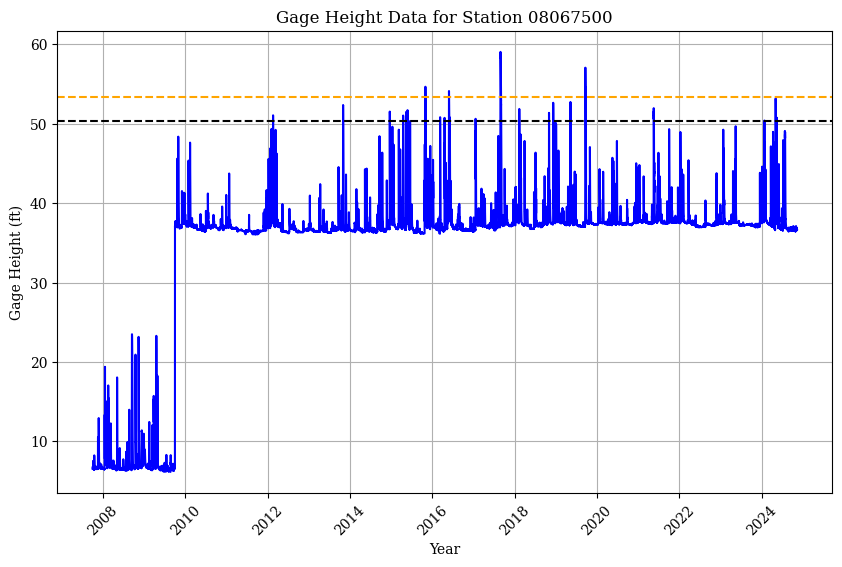

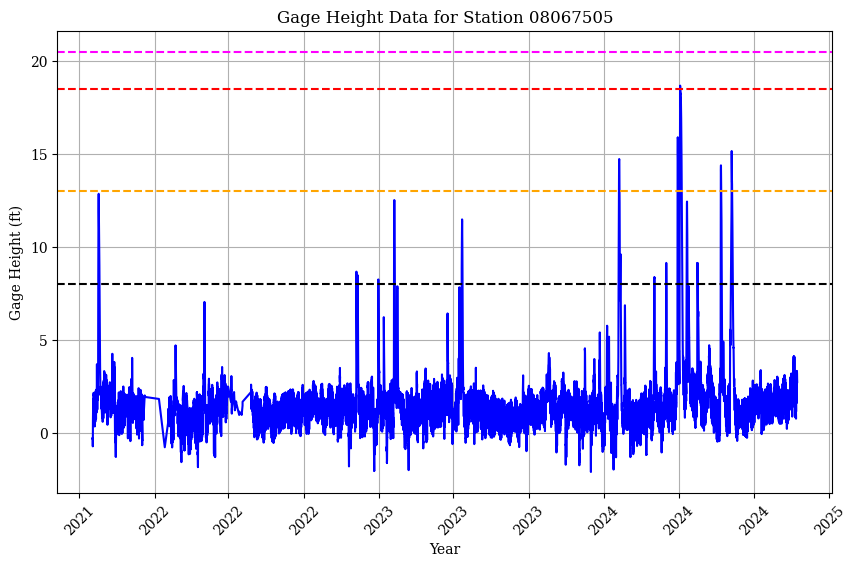

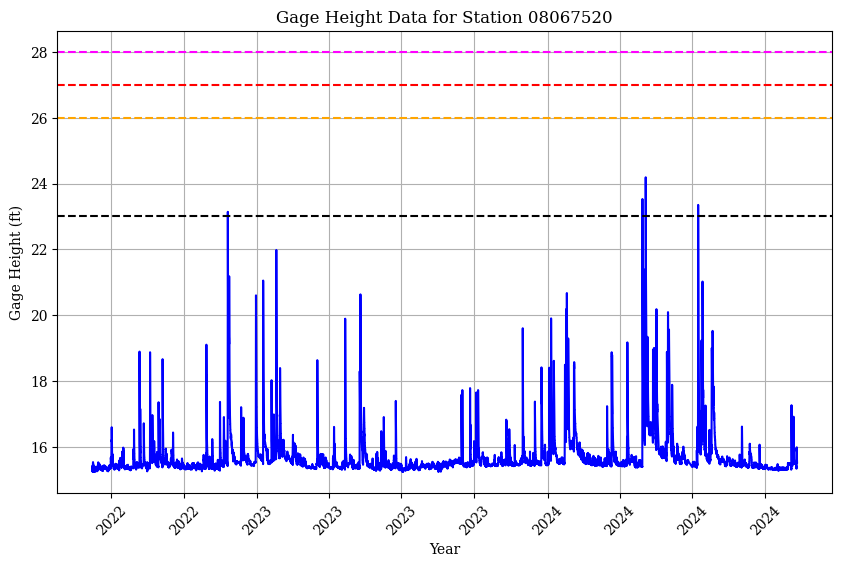

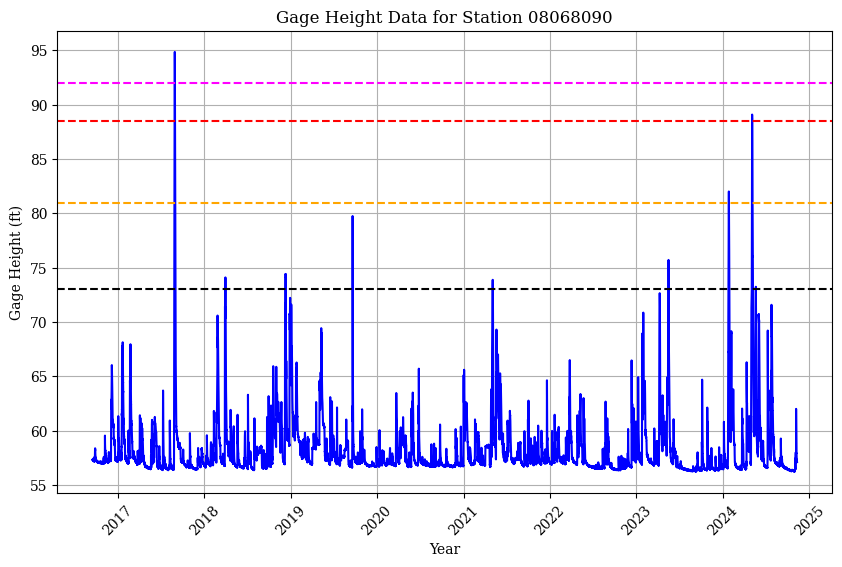

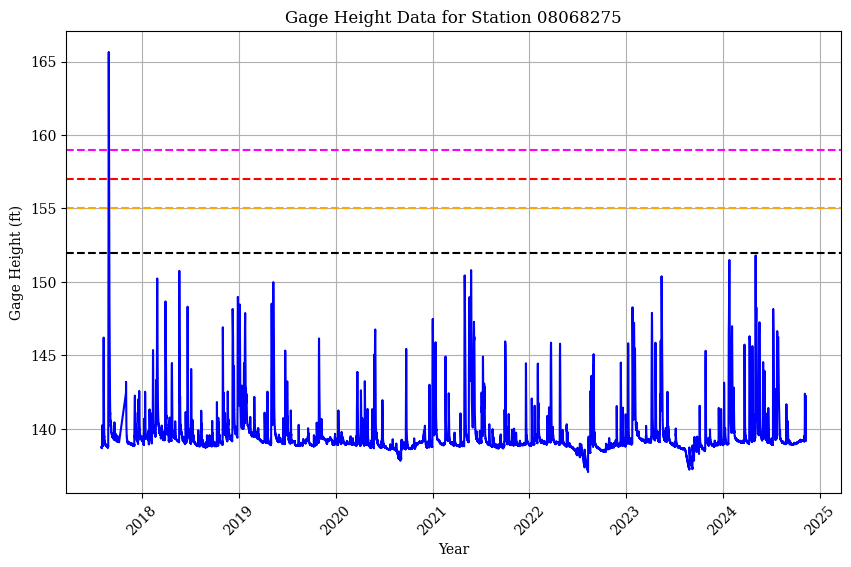

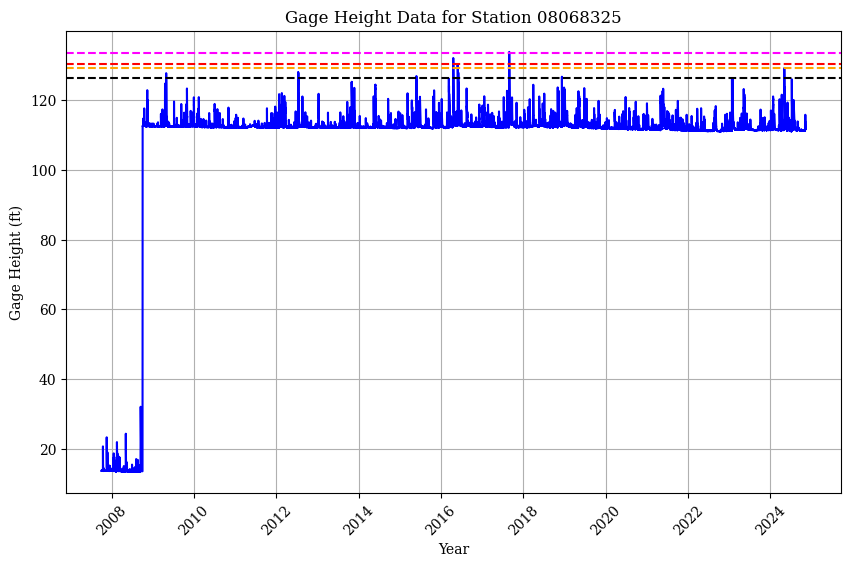

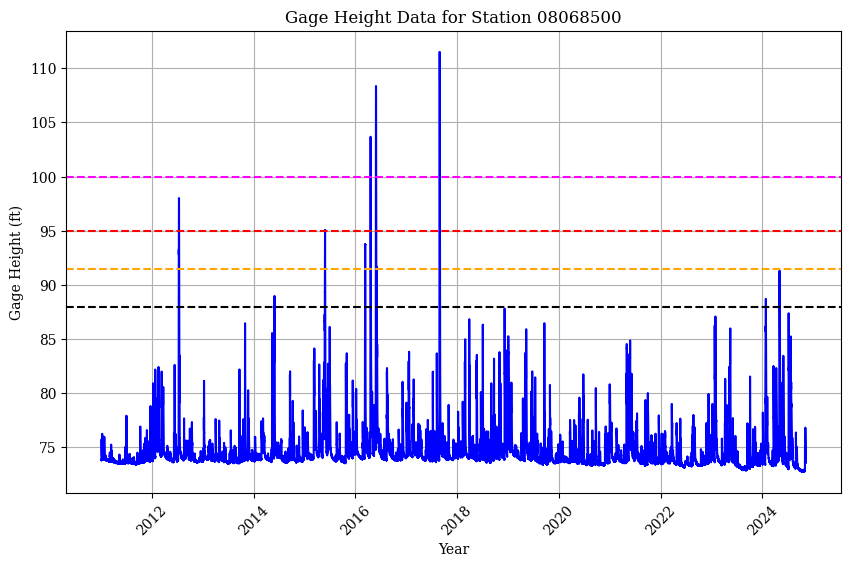

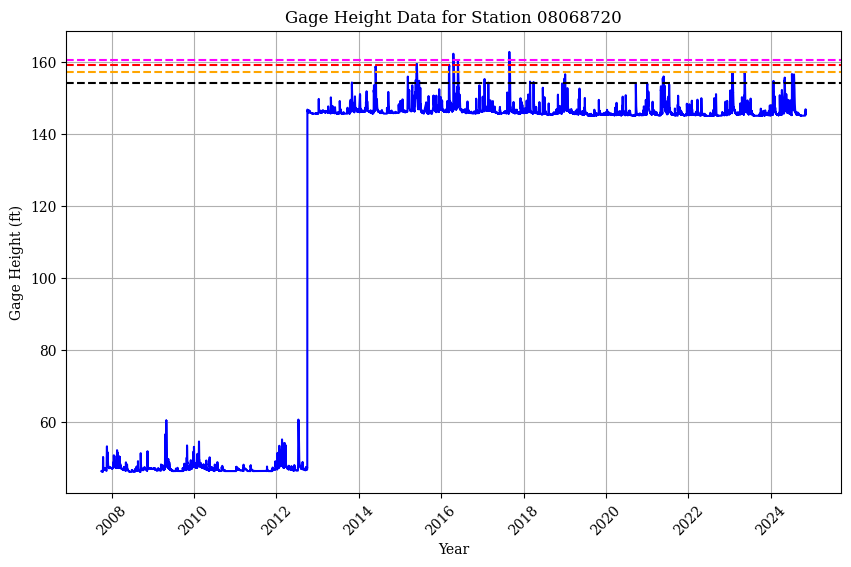

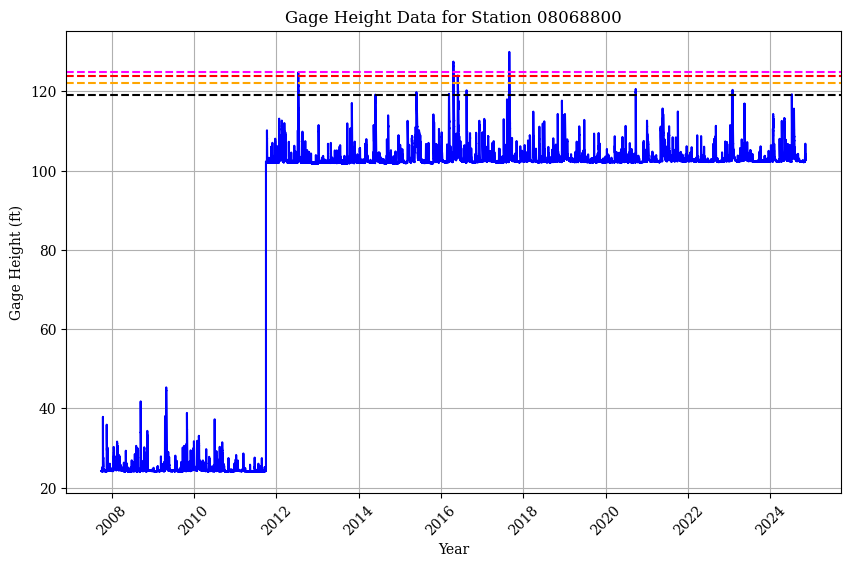

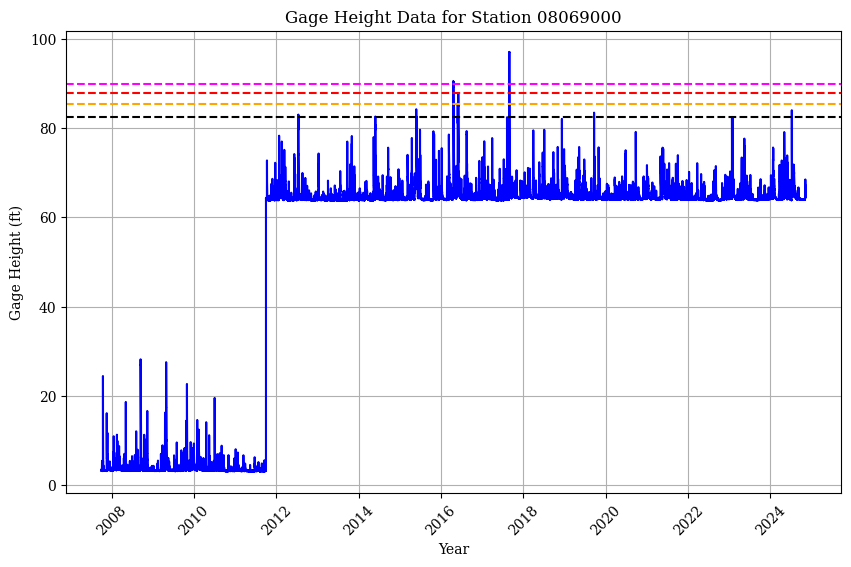

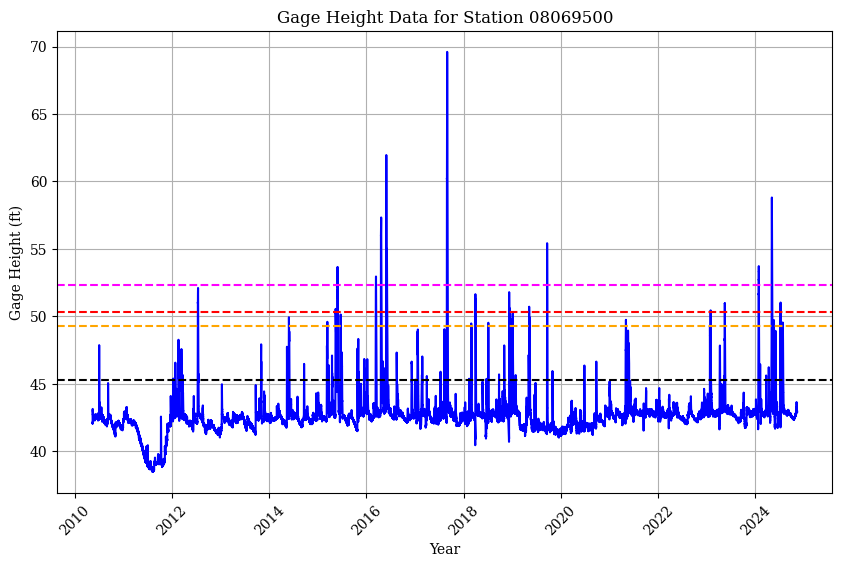

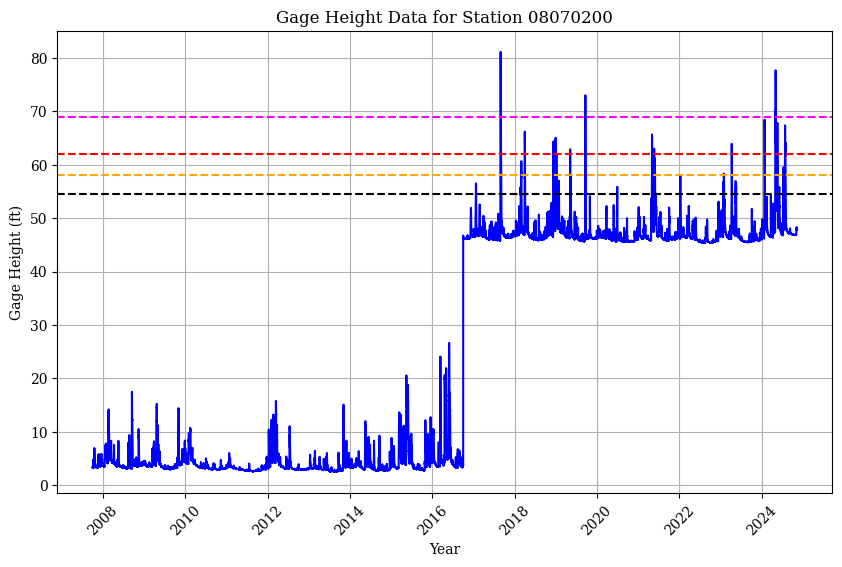

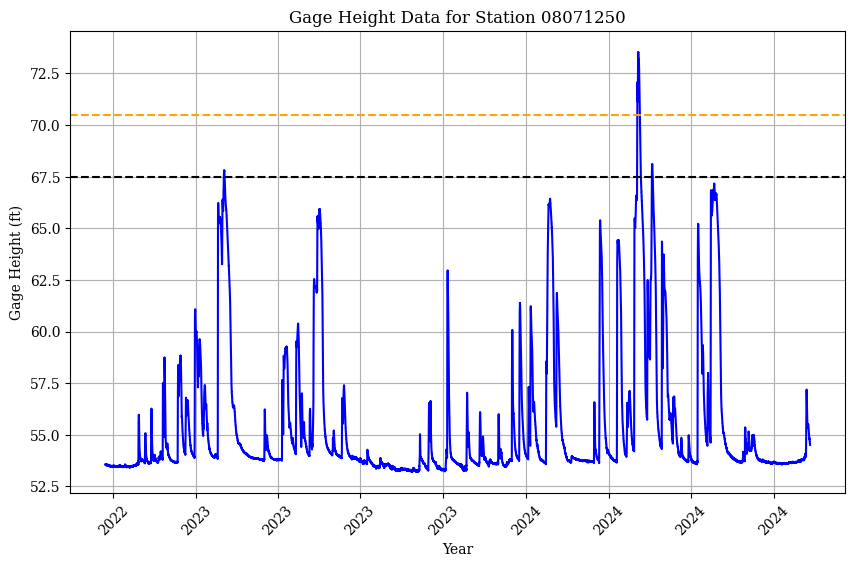

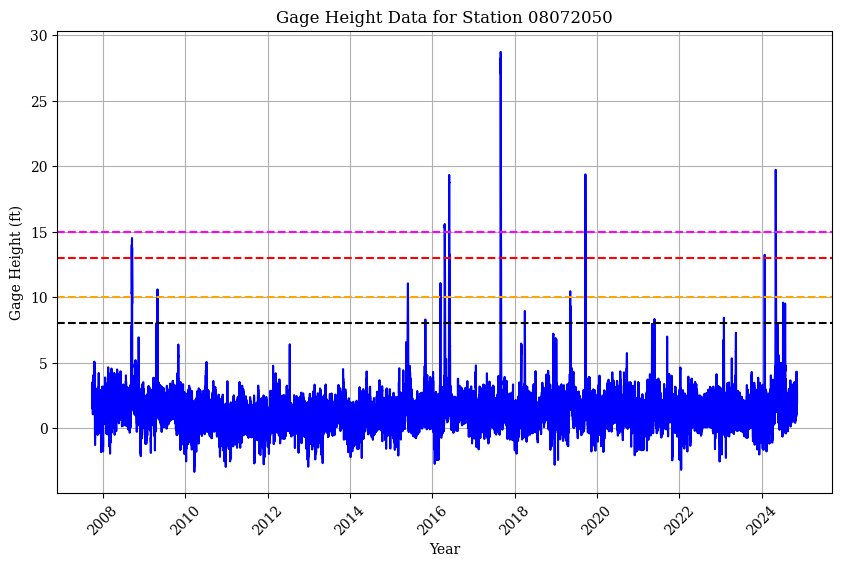

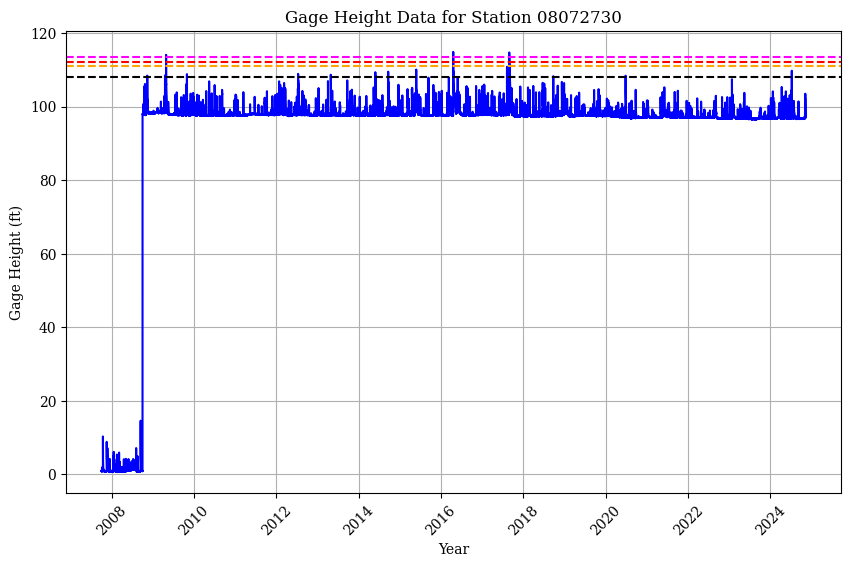

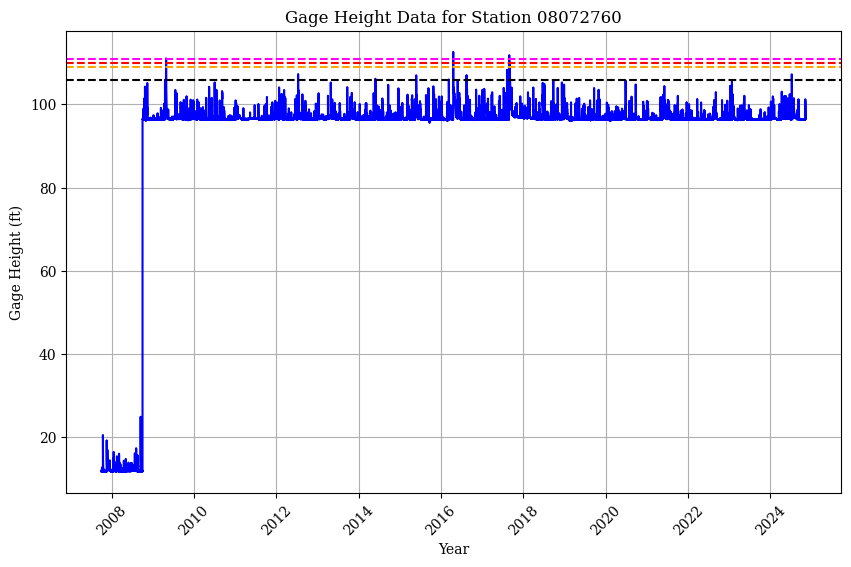

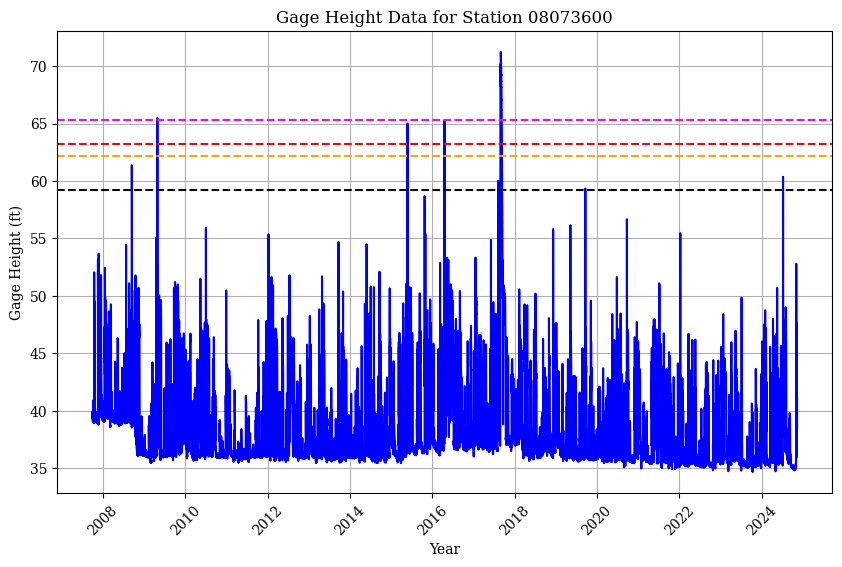

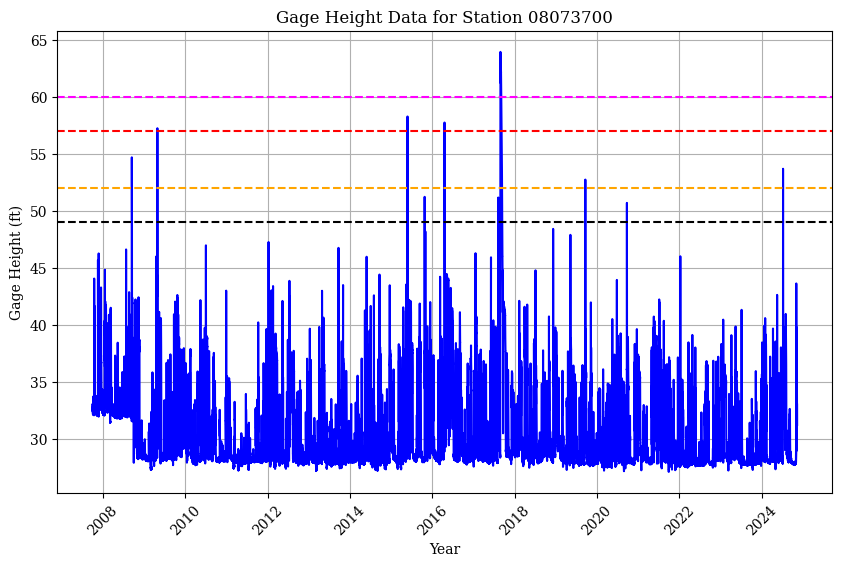

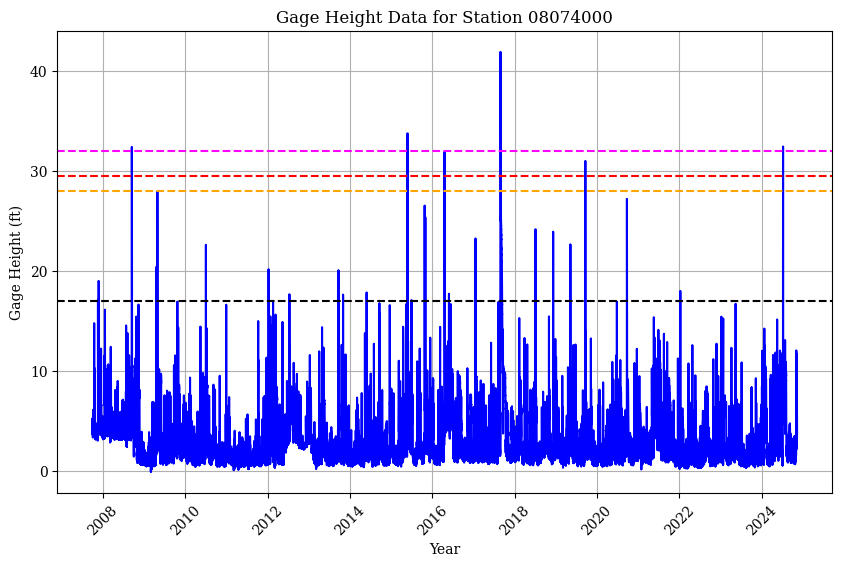

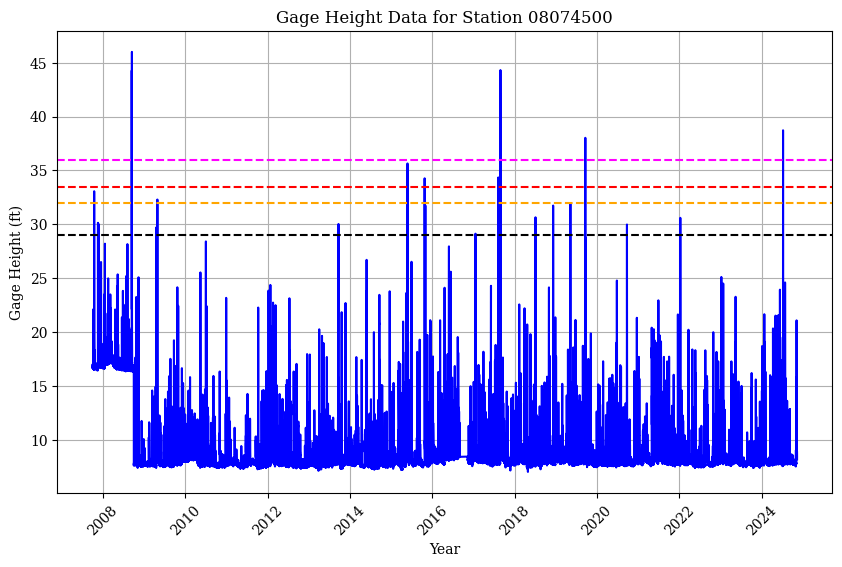

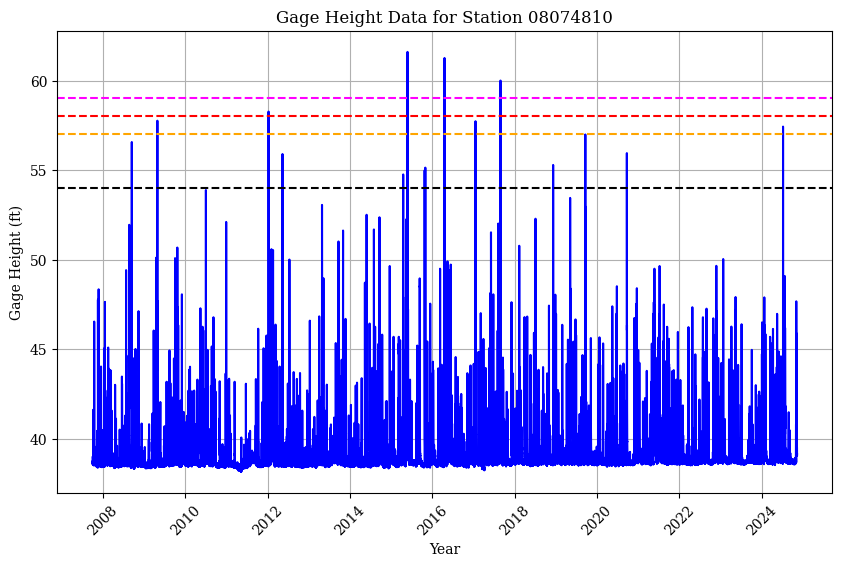

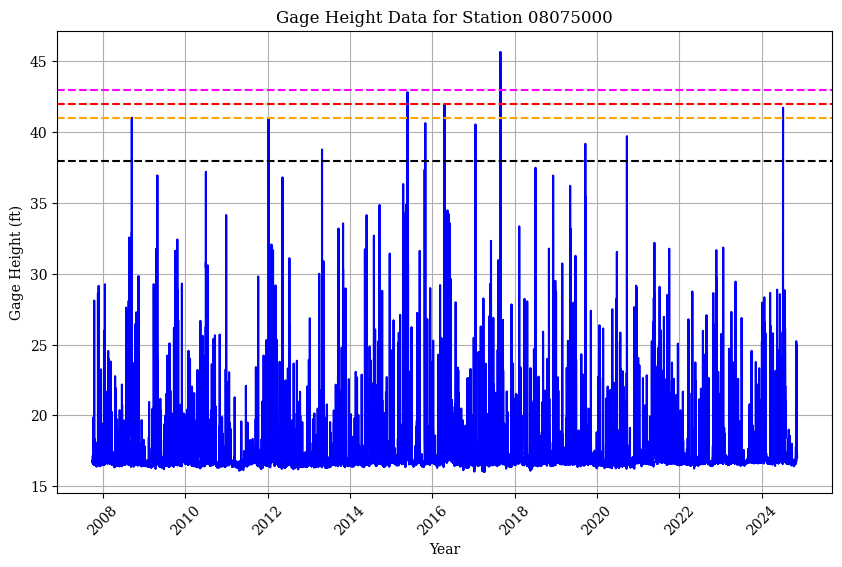

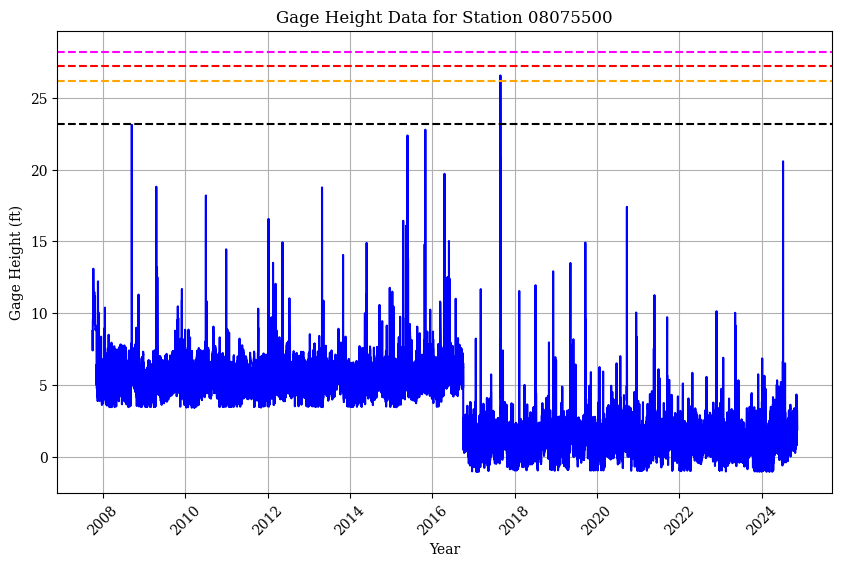

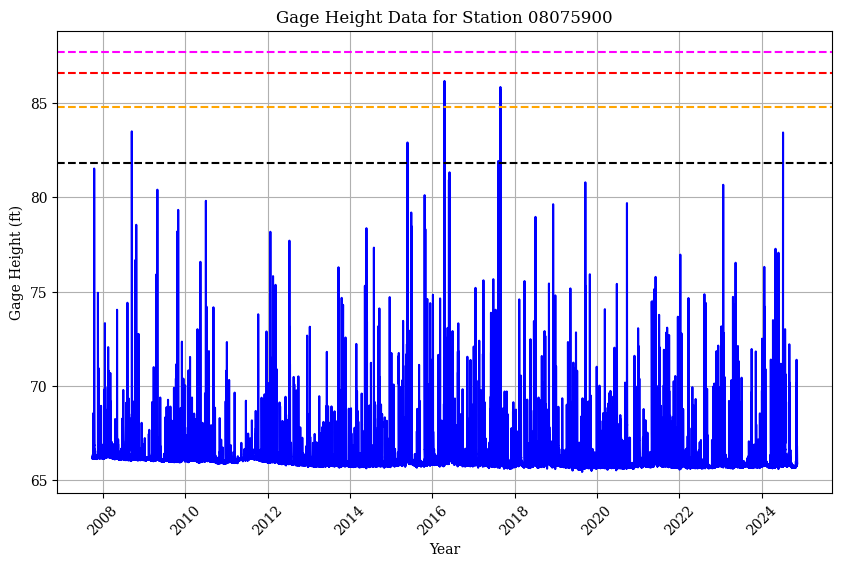

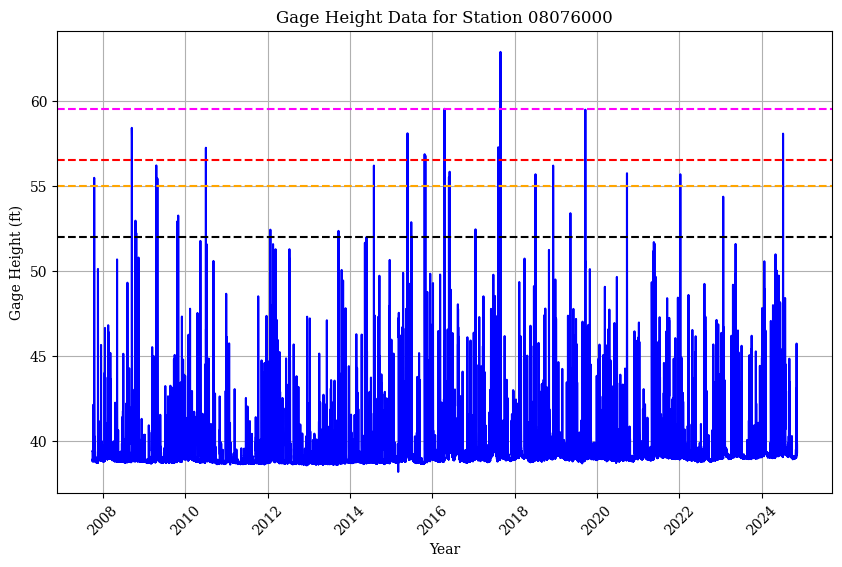

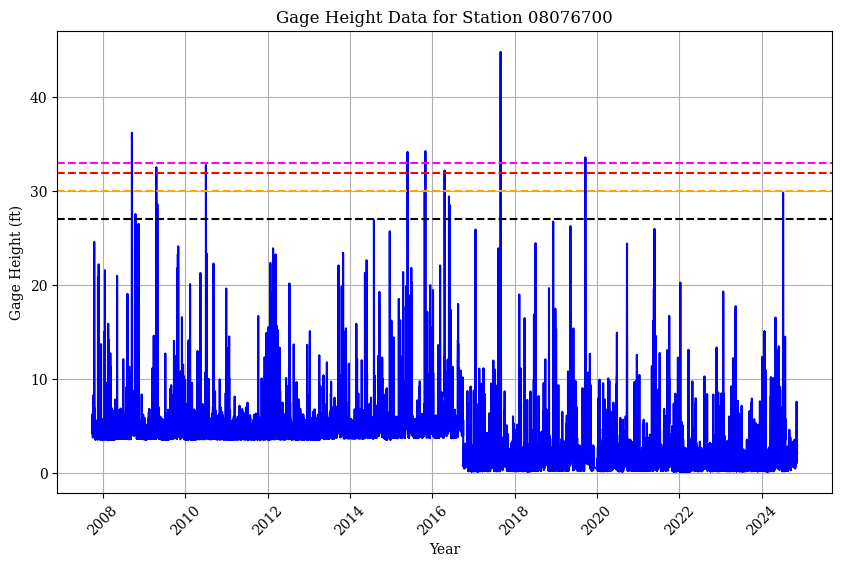

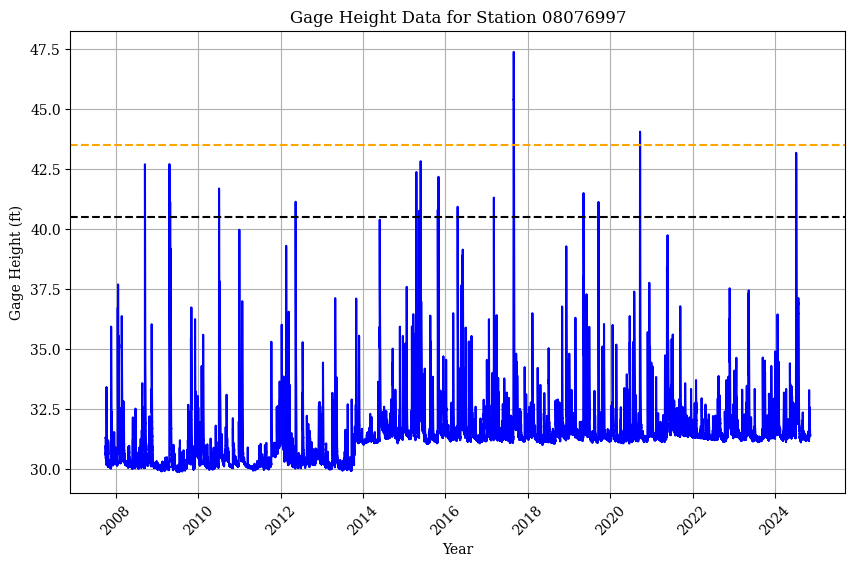

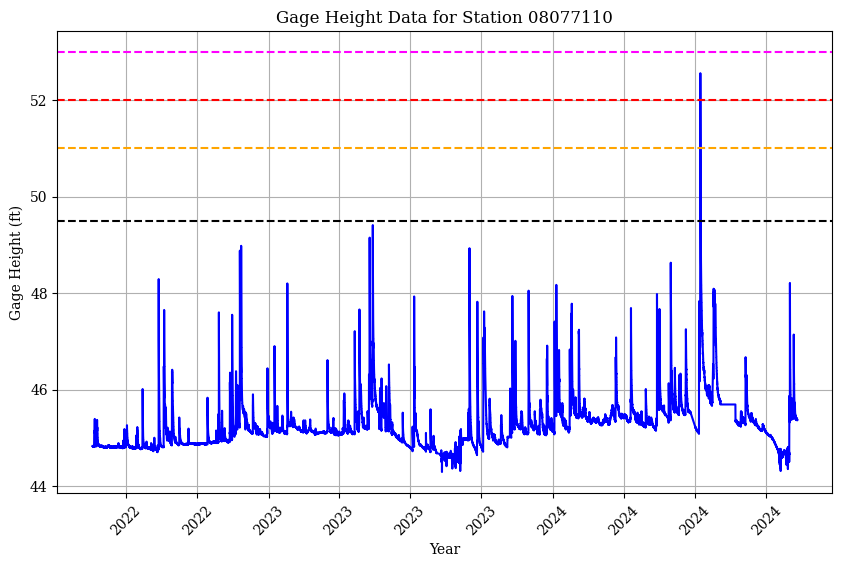

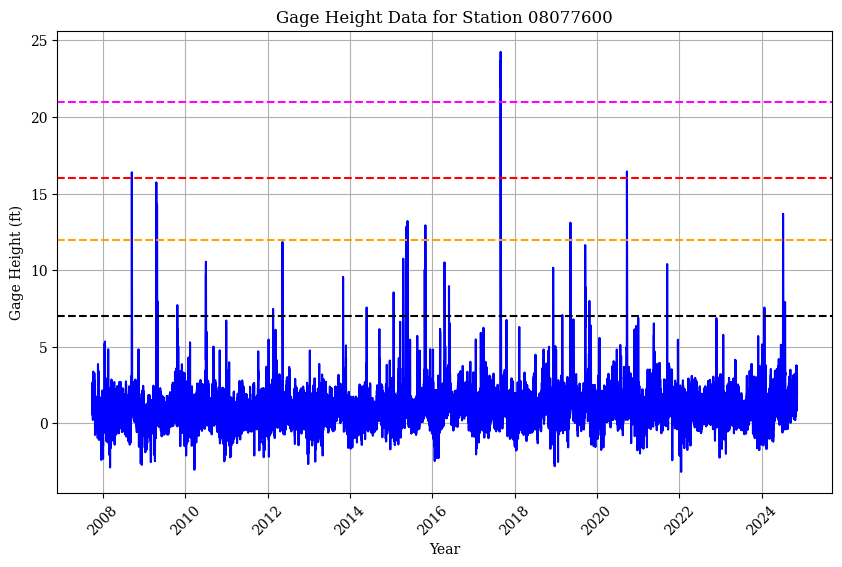

In [53]:
stations = stations_df['site_no'].values

for station in stations:
    station_data = large_df[large_df['site_no'] == station]
    
    act_val = stations_df[stations_df['site_no'] == station]['action'].values[0]
    minor_val = stations_df[stations_df['site_no'] == station]['minor_f'].values[0]
    mod_val = stations_df[stations_df['site_no'] == station]['mod_f'].values[0]
    major_val = stations_df[stations_df['site_no'] == station]['major_f'].values[0]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(station_data['datetime'], station_data['140258_00065'], color='blue', label='Gage Height')
    
    ax.axhline(major_val, color='magenta', linestyle='--', linewidth=1.5, label='Major')
    ax.axhline(mod_val, color='red', linestyle='--', linewidth=1.5, label='Moderate')
    ax.axhline(minor_val, color='orange', linestyle='--', linewidth=1.5, label='Minor')
    ax.axhline(act_val, color='black', linestyle='--', linewidth=1.5, label='Action')
    
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Gage Height (ft)')
    ax.set_title(f'Gage Height Data for Station {station}')
    
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.savefig(f"USGS/plots/station_{station}.png",dpi=300, bbox_inches='tight', pad_inches=0)

#plt.show()